In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [16, 4]

import seaborn as sns
sns.set_theme(palette="Set2")

# Read data

In [2]:
df = pd.read_csv("eth-volume-trade-minutes.csv")
df

,time,volume
0,01/12/2022 00:01,596.349383
1,01/12/2022 00:03,483.410890
2,01/12/2022 00:04,333.171840
3,01/12/2022 00:05,576.590203
4,01/12/2022 00:06,785.838052
...,...,...
40171,31/12/2022 23:55,81.705138
40172,31/12/2022 23:57,148.610069
40173,31/12/2022 23:58,313.403915
40174,31/12/2022 23:59,237.545855


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40176 entries, 0 to 40175
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   time    40176 non-null  object 
 1   volume  40176 non-null  float64
dtypes: float64(1), object(1)
memory usage: 627.9+ KB


# Convert the "time" column to the datetime type

In [4]:
df["time"] = pd.to_datetime(df["time"], format="%d/%m/%Y %H:%M")

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40176 entries, 0 to 40175
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   time    40176 non-null  datetime64[ns]
 1   volume  40176 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 627.9 KB


In [6]:
df.set_index("time", inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 40176 entries, 2022-12-01 00:01:00 to 2023-01-01 00:00:00
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   volume  40176 non-null  float64
dtypes: float64(1)
memory usage: 627.8 KB


# Missing entries

In [8]:
df.head(10)

,volume
time,
2022-12-01 00:01:00,596.349383
2022-12-01 00:03:00,483.410890
2022-12-01 00:04:00,333.171840
2022-12-01 00:05:00,576.590203
2022-12-01 00:06:00,785.838052
2022-12-01 00:07:00,1078.172285
2022-12-01 00:08:00,539.188265
2022-12-01 00:11:00,507.982391
2022-12-01 00:12:00,351.353639


In [9]:
min(df.index)

Timestamp('2022-12-01 00:01:00')

In [10]:
max(df.index)

Timestamp('2023-01-01 00:00:00')

In [11]:
all_datetimes = pd.date_range(min(df.index), max(df.index), freq="T")
all_datetimes

DatetimeIndex(['2022-12-01 00:01:00', '2022-12-01 00:02:00',
               '2022-12-01 00:03:00', '2022-12-01 00:04:00',
               '2022-12-01 00:05:00', '2022-12-01 00:06:00',
               '2022-12-01 00:07:00', '2022-12-01 00:08:00',
               '2022-12-01 00:09:00', '2022-12-01 00:10:00',
               ...
               '2022-12-31 23:51:00', '2022-12-31 23:52:00',
               '2022-12-31 23:53:00', '2022-12-31 23:54:00',
               '2022-12-31 23:55:00', '2022-12-31 23:56:00',
               '2022-12-31 23:57:00', '2022-12-31 23:58:00',
               '2022-12-31 23:59:00', '2023-01-01 00:00:00'],
              dtype='datetime64[ns]', length=44640, freq='T')

In [12]:
all_datetimes.shape

(44640,)

# Supplying missing values

## Insert missing datetimes

In [13]:
all_datetimes_df = pd.DataFrame(index=all_datetimes)
all_datetimes_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 44640 entries, 2022-12-01 00:01:00 to 2023-01-01 00:00:00
Freq: T
Empty DataFrame

In [14]:
df = pd.merge(all_datetimes_df, df, how="left", left_index=True, right_index=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 44640 entries, 2022-12-01 00:01:00 to 2023-01-01 00:00:00
Freq: T
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   volume  40176 non-null  float64
dtypes: float64(1)
memory usage: 1.7 MB


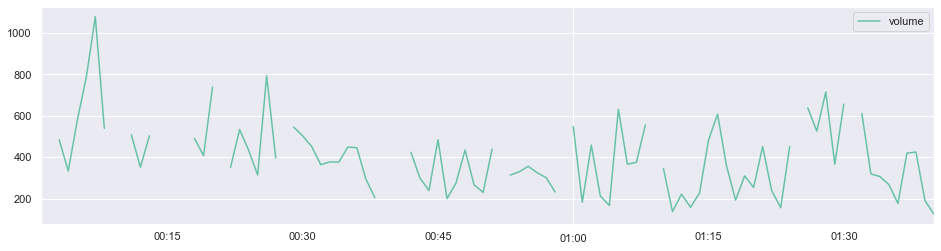

In [15]:
plot = df.head(100).plot()

## Forward-fill

In [16]:
df["ffilled"] = df["volume"].ffill()
df.head(12)

,volume,ffilled
2022-12-01 00:01:00,596.349383,596.349383
2022-12-01 00:02:00,NaN,596.349383
2022-12-01 00:03:00,483.410890,483.410890
2022-12-01 00:04:00,333.171840,333.171840
2022-12-01 00:05:00,576.590203,576.590203
2022-12-01 00:06:00,785.838052,785.838052
2022-12-01 00:07:00,1078.172285,1078.172285
2022-12-01 00:08:00,539.188265,539.188265
2022-12-01 00:09:00,NaN,539.188265
2022-12-01 00:10:00,NaN,539.188265


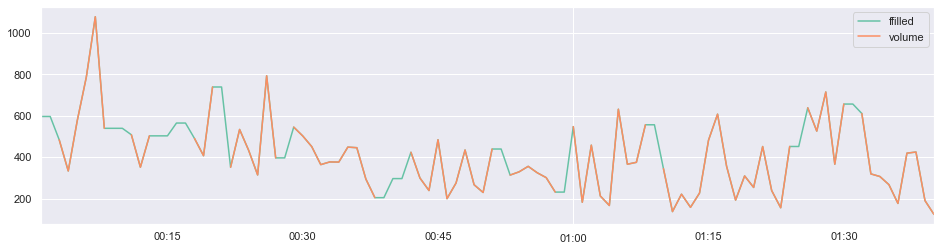

In [17]:
df = df[["ffilled", "volume"]]
plot = df.head(100).plot()

In [18]:
df.drop("ffilled", axis=1, inplace=True)

## Backward-fill

In [19]:
df["bfilled"] = df["volume"].bfill()
df.head(12)

,volume,bfilled
2022-12-01 00:01:00,596.349383,596.349383
2022-12-01 00:02:00,NaN,483.410890
2022-12-01 00:03:00,483.410890,483.410890
2022-12-01 00:04:00,333.171840,333.171840
2022-12-01 00:05:00,576.590203,576.590203
2022-12-01 00:06:00,785.838052,785.838052
2022-12-01 00:07:00,1078.172285,1078.172285
2022-12-01 00:08:00,539.188265,539.188265
2022-12-01 00:09:00,NaN,507.982391
2022-12-01 00:10:00,NaN,507.982391


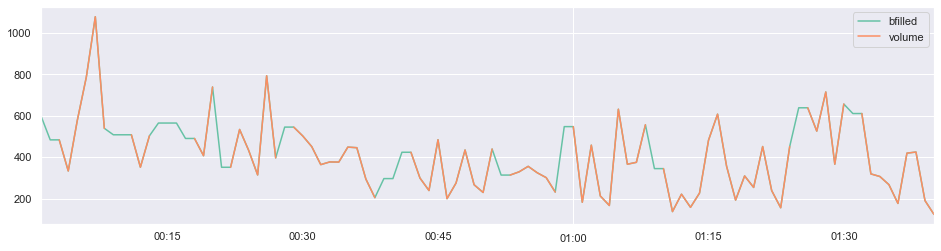

In [20]:
df = df[["bfilled", "volume"]]
plot = df.head(100).plot()

In [21]:
df.drop("bfilled", axis=1, inplace=True)

## Interpolate

In [22]:
df["interpolated"] = df["volume"].interpolate(method="linear", axis=0)
df.head(12)

,volume,interpolated
2022-12-01 00:01:00,596.349383,596.349383
2022-12-01 00:02:00,NaN,539.880136
2022-12-01 00:03:00,483.410890,483.410890
2022-12-01 00:04:00,333.171840,333.171840
2022-12-01 00:05:00,576.590203,576.590203
2022-12-01 00:06:00,785.838052,785.838052
2022-12-01 00:07:00,1078.172285,1078.172285
2022-12-01 00:08:00,539.188265,539.188265
2022-12-01 00:09:00,NaN,528.786307
2022-12-01 00:10:00,NaN,518.384349


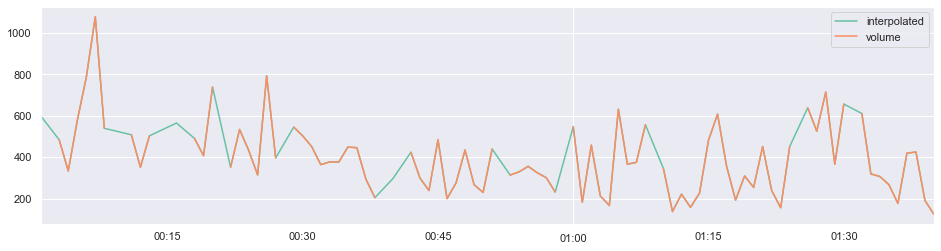

In [23]:
df = df[["interpolated", "volume"]]
plot = df.head(100).plot()

In [24]:
df.drop("interpolated", axis=1, inplace=True)

In [25]:
df = df.interpolate(method="linear", axis=0)

# Difference

In [26]:
diffed = df.diff()
diffed

,volume
2022-12-01 00:01:00,NaN
2022-12-01 00:02:00,-56.469247
2022-12-01 00:03:00,-56.469247
2022-12-01 00:04:00,-150.239050
2022-12-01 00:05:00,243.418363
...,...
2022-12-31 23:56:00,33.452465
2022-12-31 23:57:00,33.452465
2022-12-31 23:58:00,164.793846
2022-12-31 23:59:00,-75.858059


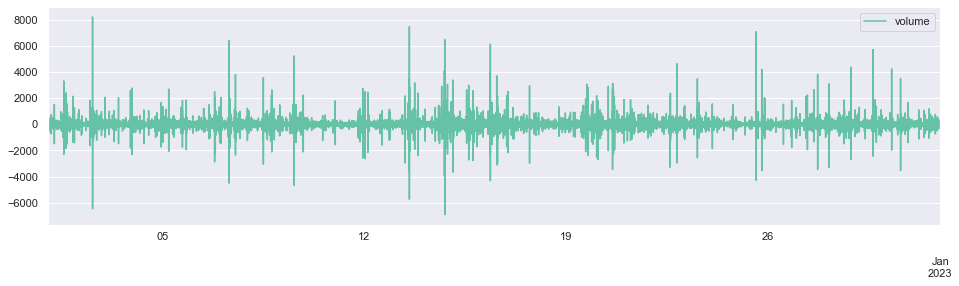

In [27]:
plot = diffed.plot()

# Shift

In [28]:
df["shifted"] = df["volume"].shift(1)
df.head()

,volume,shifted
2022-12-01 00:01:00,596.349383,NaN
2022-12-01 00:02:00,539.880136,596.349383
2022-12-01 00:03:00,483.410890,539.880136
2022-12-01 00:04:00,333.171840,483.410890
2022-12-01 00:05:00,576.590203,333.171840


In [29]:
df["shifted"] = df["volume"].shift(-1)
df.head()

,volume,shifted
2022-12-01 00:01:00,596.349383,539.880136
2022-12-01 00:02:00,539.880136,483.410890
2022-12-01 00:03:00,483.410890,333.171840
2022-12-01 00:04:00,333.171840,576.590203
2022-12-01 00:05:00,576.590203,785.838052


In [30]:
df.drop("shifted", axis=1, inplace=True)

# Resample

## Downsample into hourly bins

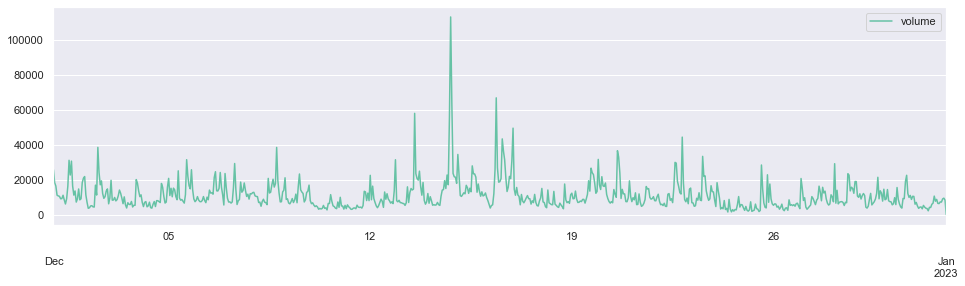

In [31]:
df_h = df.resample("H").sum()
plot = df_h.plot()

In [32]:
df_h.head()

,volume
2022-12-01 00:00:00,25797.624757
2022-12-01 01:00:00,18419.125015
2022-12-01 02:00:00,16476.129231
2022-12-01 03:00:00,11223.324778
2022-12-01 04:00:00,10822.758324


## Downsample into 10-min bins

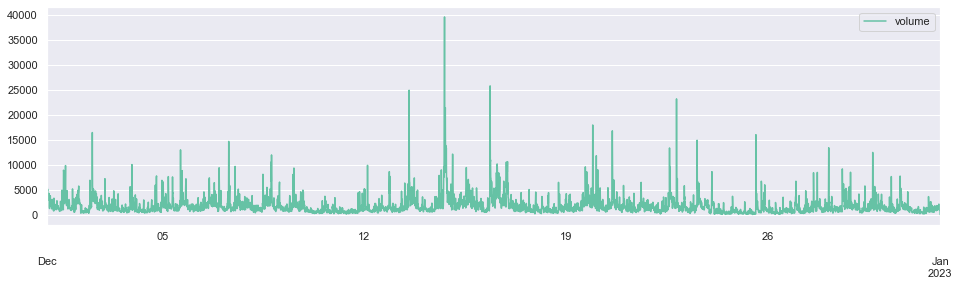

In [33]:
df_t = df.resample("10T").sum()
plot = df_t.plot()

In [34]:
df_t.head()

,volume
2022-12-01 00:00:00,5461.387361
2022-12-01 00:10:00,4937.229566
2022-12-01 00:20:00,5120.749219
2022-12-01 00:30:00,3712.593034
2022-12-01 00:40:00,3277.168682


## Downsample into 3-day bins

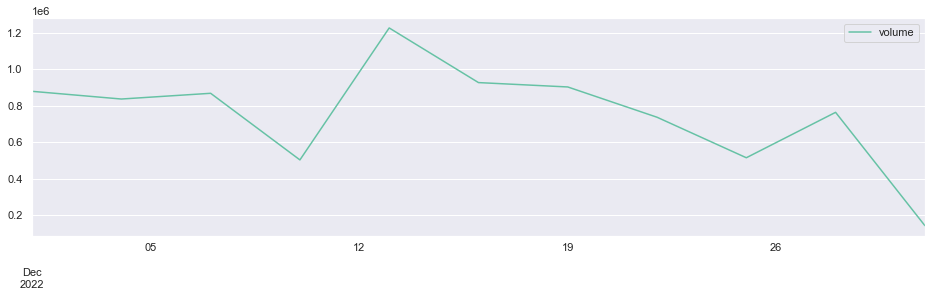

In [35]:
df_3d = df.resample("3D").sum()
plot = df_3d.plot()

In [36]:
df_3d.head()

,volume
2022-12-01,8.791672e+05
2022-12-04,8.369824e+05
2022-12-07,8.683480e+05
2022-12-10,5.035590e+05
2022-12-13,1.226217e+06


## Upsample into 30s bins

In [37]:
df_30s = df.resample("30s").ffill()
df_30s.head(10)

,volume
2022-12-01 00:01:00,596.349383
2022-12-01 00:01:30,596.349383
2022-12-01 00:02:00,539.880136
2022-12-01 00:02:30,539.880136
2022-12-01 00:03:00,483.410890
2022-12-01 00:03:30,483.410890
2022-12-01 00:04:00,333.171840
2022-12-01 00:04:30,333.171840
2022-12-01 00:05:00,576.590203
2022-12-01 00:05:30,576.590203


# Window

In [38]:
df["5min_window"] = df["volume"].rolling(5, center=True).mean()
df.head(10)

,volume,5min_window
2022-12-01 00:01:00,596.349383,NaN
2022-12-01 00:02:00,539.880136,NaN
2022-12-01 00:03:00,483.410890,505.880490
2022-12-01 00:04:00,333.171840,543.778224
2022-12-01 00:05:00,576.590203,651.436654
2022-12-01 00:06:00,785.838052,662.592129
2022-12-01 00:07:00,1078.172285,701.715022
2022-12-01 00:08:00,539.188265,690.073852
2022-12-01 00:09:00,528.786307,634.502719
2022-12-01 00:10:00,518.384349,489.138990


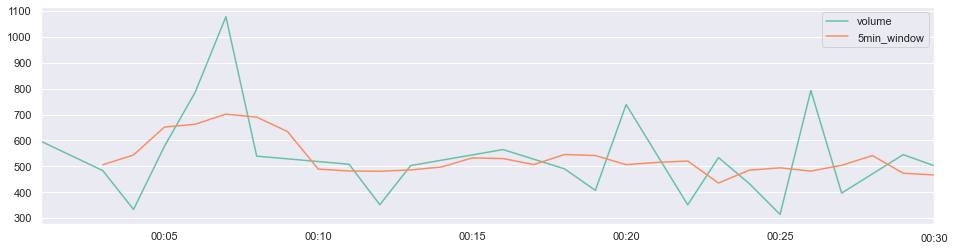

In [39]:
plot = df.head(30).plot()

# Citing this notebook

If you use this notebook in your work, please cite it as follows:
    
Pekar, V. (2023). Big Data for Decision Making. Lecture examples and exercises. (Version 1.0.0). URL: https://github.com/vpekar/bd4dm